# TP04 Exercice 1

Student names:
- Dan Yvan Baumgartner
- Jan Huber

## Exercice 1 Get the data

In [1]:
import numpy as np             
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Read the training data
dataset = 'lausanne-appart.xlsx'
df_train = pd.read_excel(dataset)
df_train = df_train.iloc[:,0:3]

# Format the training data
x = df_train.iloc[:, 2].values
y = df_train.iloc[:, 0].values

a = np.array([x,]*(1)).transpose()
b = np.vstack(np.ones(len(x)))
X = np.append(b, a, 1)

xUnseen = np.linspace(np.min(x),np.max(x), 200)

### a) histogram to visualize the distribution of the renting price

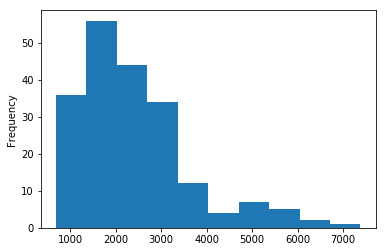

In [2]:
df_train.iloc[:, 2].plot.hist()

### b) histogram to visualize the distribution of the living area

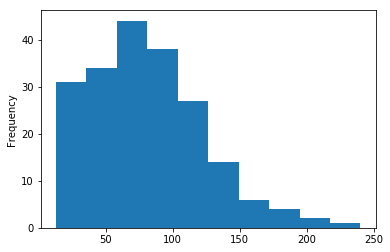

In [3]:
df_train.iloc[:, 0].plot.hist()

### c) scatter plot of living area as a function of renting price

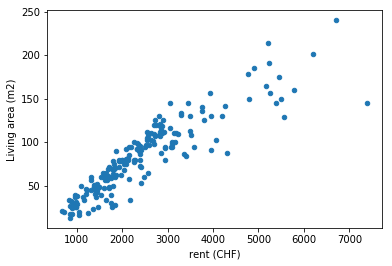

In [4]:
df_train.plot.scatter(y='Living area (m2)', x='rent (CHF)')

## Exercice 2  Normal equations for linear regression

$\theta = \left( X^{T}X \right)^{-1}X^{T} \overrightarrow{y}$

The parameters for theta are:
Theta_0 = 7.350457052063334
Theta_1 = 0.03105171492935603


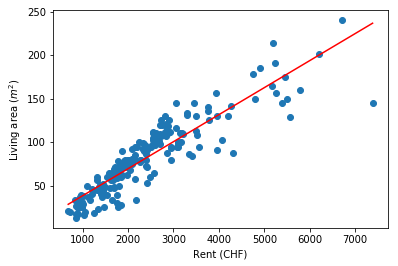

In [5]:
theta_2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)), X.transpose()), y)

h_2 = np.poly1d((theta_2[1], theta_2[0]))
yHat_2 = h_2(xUnseen)

def f_y(coef,x):
    return coef[0]+x*coef[1]

plt.scatter(x, y)
plt.plot(xUnseen, yHat_2, 'r')
plt.xlabel('Rent (CHF)')
plt.ylabel('Living area ($m^2$)')

print("The parameters for theta are:\n"
    "Theta_0 = {}\n"
    "Theta_1 = {}".format(theta_2[0], theta_2[1]))

### Overall cost value

$J( \theta )= \dfrac{1}{2N} \sum \limits_{n=1}^{N}(h_{\theta}(x_n)-y_n)^{2}$

In [6]:
J_teta_2 = 1/(2*len(x))*np.sum(np.square((h_2(x)-y)))
print('The overall cost value is : {}\n'.format(J_teta_2))

The overall cost value is : 162.77354742273306



## Exercice 3 Batch gradient descent for linear regression

$\theta_{0} \leftarrow \theta_{0} - \alpha \dfrac{1}{N} \sum \limits_{n=1}^{N}(h_{\theta}(x_n)-y_n)$

$\theta_{1} \leftarrow \theta_{1} - \alpha \dfrac{1}{N} \sum \limits_{n=1}^{N}(h_{\theta}(x_n)-y_n)x_{n,1}$

A more generalised notation would be:

$\theta_{i} \leftarrow \theta_{i} - \alpha \dfrac{1}{N} \sum \limits_{n=1}^{N}(h_{\theta}(x_n)-y_n)x_{n,i}$

In [7]:
def batch_grad(X, y, alpha=0.00000001, num_iter=100, epsilon=0.0001, advanced=False):
    num_features = X.shape[1]
    len_features = X.shape[0]
    
    theta = np.zeros(num_features) # init theta
    h = np.poly1d( (np.flipud(theta)) ) # init fitting function
    J_theta_old = 0 #1/(2*len_features)*np.sum(np.square(h(X[:, 1])-y))
    J_theta_new = 0

    if advanced:
        num_iter = 0
        k = 2*epsilon
        while k>epsilon:
            J_theta_old = J_theta_new

            theta[0] = theta[0] - alpha/len_features * np.sum(h(X[:, 1]) - y)
            theta[1] = theta[1] - alpha/len_features * np.sum((h(X[:, 1]) - y)*X[:, 1])

            #for i in range(num_features):
            #    theta[i] = theta[i] - alpha/len_features * np.sum( (np.sum(theta*X) - y)*X[:, i] )

            h = np.poly1d( (np.flipud(theta)) ) # update fitting function
            
            J_theta_new = 1/(2*len_features)*np.sum(np.square(h(X[:, 1])-y))
            plt.scatter(num_iter, J_theta_new)
            plt.xlabel('Number of iterations')
            plt.ylabel('J(Theta)')

            k = np.abs((J_theta_old - J_theta_new)/J_theta_new)
            num_iter += 1
        
        print("The number of iterations was: {}\n".format(num_iter))
            
    else:
        k = 0
        while k<num_iter:
            theta[0] = theta[0] - alpha/len_features * np.sum(h(X[:, 1]) - y)
            theta[1] = theta[1] - alpha/len_features * np.sum((h(X[:, 1]) - y)*X[:, 1])

            #for i in range(num_features):
            #    theta[i] = theta[i] - alpha/len_features * np.sum( (np.sum(theta*X) - y)*X[:, i] )
            h = np.poly1d( (np.flipud(theta)) ) # update fitting function
            
            J_theta_new = 1/(2*len_features)*np.sum(np.square(h(X[:, 1])-y))
            plt.scatter(k, J_theta_new)
            plt.xlabel('Number of iterations')
            plt.ylabel('J(Theta)')

            k += 1  
    
    return theta


### a) Plot the cost value as a function of the iterations. What do you observe ?

The parameters for theta are:
Theta_0 = 1.2653775112476772e-05
Theta_1 = 0.03347009889647493



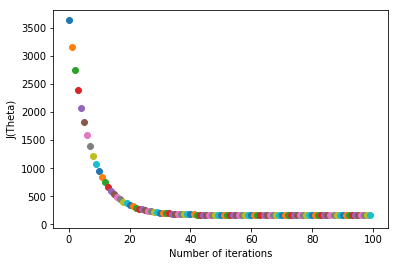

In [8]:
alpha = 0.00000001
num_iter = 100

theta_3 = batch_grad(X, y, alpha, num_iter)

print("The parameters for theta are:\n"
    "Theta_0 = {}\n"
    "Theta_1 = {}\n".format(theta_3[0], theta_3[1]))


### b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set ?

$\dfrac{ J(\theta)^{{epoch}_{n-1}} - J(\theta)^{{epoch}_{n}} }{ J(\theta)^{{epoch}_{n}} } < \epsilon$

The number of iterations was: 71

The parameters for theta are:
Theta_0 = 1.2153743566295936e-05
Theta_1 = 0.03331965023127783



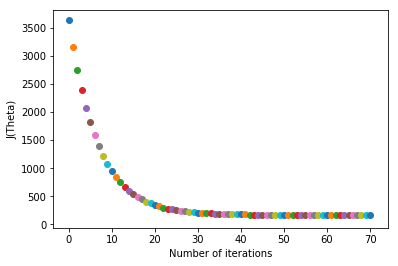

In [9]:
alpha = 0.00000001
epsilon = 0.0001

theta_3 = batch_grad(X, y, alpha=alpha, epsilon=epsilon, advanced=True)

print("The parameters for theta are:\n"
    "Theta_0 = {}\n"
    "Theta_1 = {}\n".format(theta_3[0], theta_3[1]))


### c) Plot the computed line hθ(x) on top of the scatter plot of exercise 1.

Text(0,0.5,'Living area ($m^2$)')

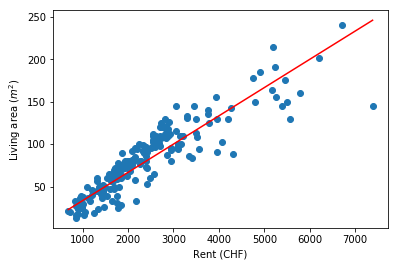

In [10]:
h_3 = np.poly1d((theta_3[1],theta_3[0]))

yHat_3 = h_3(xUnseen)

plt.scatter(x, y)
plt.plot(xUnseen, yHat_3, 'r')
plt.xlabel('Rent (CHF)')
plt.ylabel('Living area ($m^2$)')


### d) Compute the final cost value and compare it to the one of exercise 2. What can you conclude ?

In [11]:
J_theta_3 = 1/(2*len(x))*np.sum(np.square((h_3(x)-y)))
print('The overall cost value is : {}\n'.format(J_theta_3))


The overall cost value is : 168.58186856567949



## Exercice 4 Stochastic gradient descent for linear regression

$\theta_{i} \leftarrow \theta_i - \alpha (h_{\theta}(x_n)-y_n)x_{n,i}$

In [37]:
def stoch_grad(X, y, alpha=0.00000001, epsilon=0.0001):
    num_features = X.shape[1]
    len_features = X.shape[0]
    
    theta = np.zeros(num_features) # init theta
    h = np.poly1d( (np.flipud(theta)) ) # init fitting function
    
    J_theta = 0    
    cost = [0]

    num_samp = 0
    k = 2*epsilon
    while k>epsilon:
        rand_idx = random.randint(0, len_features-1)
        
        theta[0] = theta[0] - alpha * (h(X[rand_idx, 1]) - y[rand_idx])
        theta[1] = theta[1] - alpha * ((h(X[rand_idx, 1]) - y[rand_idx])*X[rand_idx, 1])
        
        h = np.poly1d( (np.flipud(theta)) ) # update fitting function
        
        cost = np.append( cost, 0.5*np.square(h(X[rand_idx, 1]) - y[rand_idx]) )
       
        J_theta_old = 1/len(cost[:-1]) * np.sum(cost[:-1])
        J_theta_new = 1/len(cost) * np.sum(cost)
        plt.scatter(num_samp, J_theta_new)
        plt.xlabel('Number of iterations')
        plt.ylabel('J(Theta)')

        k = np.abs((J_theta_old - J_theta_new)/J_theta_new)
        num_samp += 1

    
    return theta, num_samp


### a) Plot the computed line hθ(x) on top of the scatter plot of exercise 1.

The parameters for theta are:
Theta_0 = 1.7132028361235128e-05
Theta_1 = 0.03488137372147914



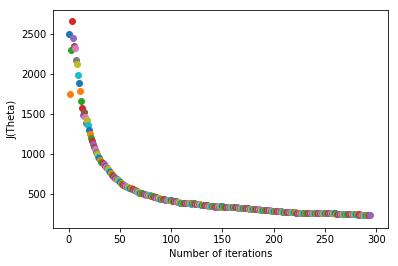

In [44]:
alpha = 0.00000001
epsilon = 0.0001

theta_4, num_samp = stoch_grad(X, y, alpha=alpha, epsilon=epsilon)

print("The parameters for theta are:\n"
    "Theta_0 = {}\n"
    "Theta_1 = {}\n".format(theta_4[0], theta_4[1]))


Text(0,0.5,'Living area ($m^2$)')

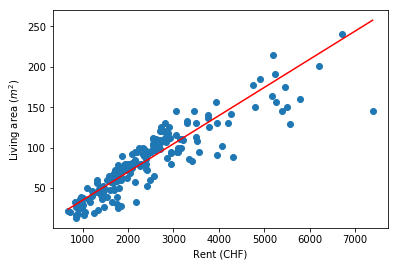

In [45]:
h_4 = np.poly1d((theta_4[1],theta_4[0]))
yHat_4 = h_4(xUnseen)

plt.scatter(x,y)
plt.plot(xUnseen, yHat_4, 'r')
plt.xlabel('Rent (CHF)')
plt.ylabel('Living area ($m^2$)')

### b) How many samples do you need to visit for reaching the convergence ?

With the same parameters for alpha and epsilon, we need to visit about 200 samples on average to reach the convergence.

The average number of samples visited in 10 runs to reach convergence is: 233


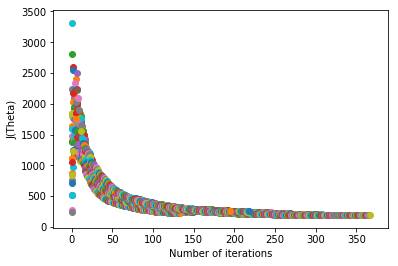

In [46]:
samples = []
runs = 10

for i in range(runs):
    theta_4, num_samp = stoch_grad(X, y, alpha=alpha, epsilon=epsilon)
    samples = np.append(samples, num_samp)
    
avg_num_samp = np.mean(samples)
print("The average number of samples visited in {} runs to reach convergence is: {}".format(runs, int(avg_num_samp)) )


### c) What kind of stopping criterion could we use here ?

The following equations will be used to calculate the cost:

$cost(\theta, (x_n, y_n)) = \dfrac{1}{2} (h_\theta(x_n) - y_n)^2$

$J( \theta )= \dfrac{1}{M} \sum \limits_{n=1}^{M}cost(\theta, (x_n, y_n))$, with M being the number of elements in cost().

*Source: https://www.youtube.com/watch?time_continue=558&v=UfNU3Vhv5CA*


With this, the following stoping criterion can be used again:

$\dfrac{ J(\theta)^{{epoch}_{n-1}} - J(\theta)^{{epoch}_{n}} }{ J(\theta)^{{epoch}_{n}} } < \epsilon$



### d) Compute the final cost value and compare it to the one of exercise 2 and 3. What can you conclude ?


The average overall cost of 10 runs is: 175.42090326308215


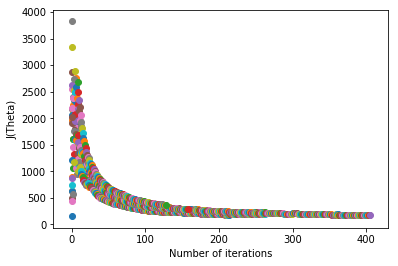

In [47]:
J_theta_4 = []
runs = 10

for i in range(runs):
    theta_4, num_samp = stoch_grad(X, y, alpha=alpha, epsilon=epsilon)
    J_theta_4 = np.append(J_theta_4, 1/(2*len(x))*np.sum(np.square((h_4(x)-y))))
    
J_theta_avg = np.mean(J_theta_4)
print("The average overall cost of {} runs is: {}".format(runs, J_theta_avg) )
